# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Problem-1

How many samples does the dataset have?

In [ ]:
# Enter your solution here
print(X.shape[0]) #nxd

100


## Problem-2

How many features does the dataset have?

In [ ]:
# Enter your solution here
print(X.shape[1])

784


## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

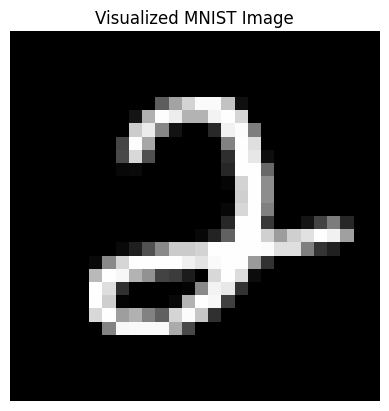

In [ ]:
# Enter your solution here
from matplotlib import pyplot as plt

image = X[1].reshape(28,28)

plt.imshow(image,cmap="gray")
plt.title("Visualized MNIST Image")
plt.axis("off")
plt.show()

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [ ]:
# Enter your solution here
x_mean = np.mean(X,axis=0)
x_centered = X - x_mean

n,d = x_centered.shape

sum_x_centered = np.sum(x_centered ** 2)

sqrt_sum_x_centered = np.sqrt(sum_x_centered)

result = (1/(n*d)) * sqrt_sum_x_centered

result.round(2)


np.float64(0.23)

## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [ ]:
# Enter your solution here
cov_mat = (x_centered.T @ x_centered)/n

result = (np.sqrt(np.sum(cov_mat**2)) / d**2).round(2)

print(result)


1.36


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
# Enter your solution here
eigen_val,eigen_vect = np.linalg.eigh(cov_mat)

w1,w2 = eigen_vect[:,-1],eigen_vect[:,-2]

w = w1 + w2

result = (np.sum(w)).round(2)

print(result)


1.05


## Problem-7

Visualize the first principal component as an image.

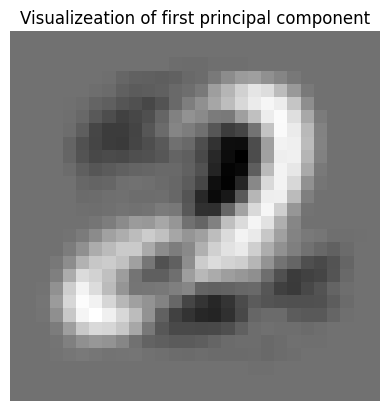

In [ ]:
# Enter your solution here
img = w1.reshape(28,28)
plt.imshow(img,cmap="gray")
plt.title("Visualizeation of first principal component")
plt.axis("off")
plt.show()

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [ ]:
# Enter your solution here
def first_k(var):

  sorted_eigen_val = sorted(eigen_val,reverse=True)

  sum_of_eigen_val = np.sum(sorted_eigen_val)
  for i in range(len(sorted_eigen_val)):
    ratio = np.sum(sorted_eigen_val[:i])/sum_of_eigen_val
    if ratio >= var:
      break
  return i

first_k(0.95)

53

## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



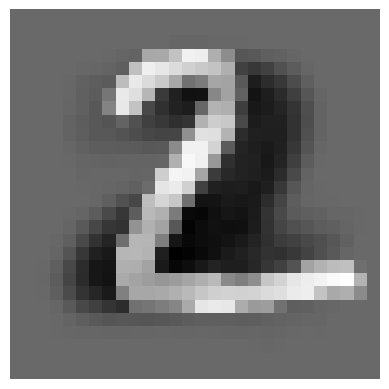

In [ ]:
# Enter your solution here
centered_test_image = test_image - X.mean(axis=0)
plt.imshow(centered_test_image.reshape((28,28)), cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
k_values = []
targets = [0.20, 0.50, 0.80, 0.95]
for t in targets:
  k_values += [first_k(t)]
k_values


[2, 6, 22, 53]

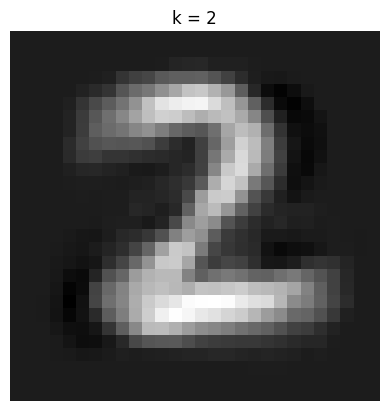

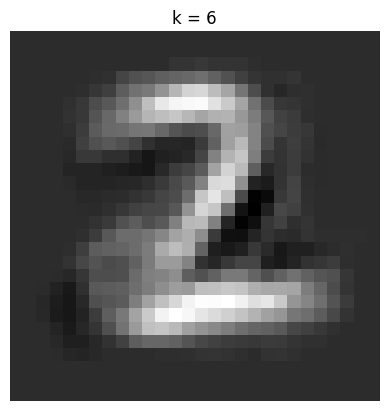

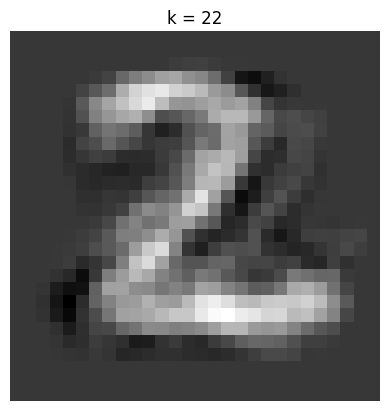

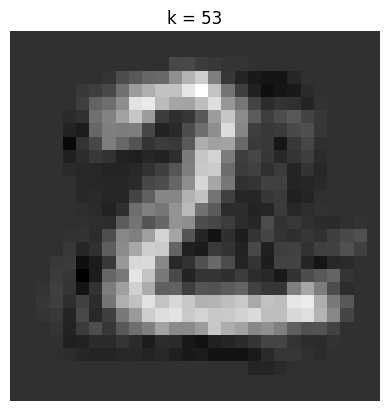

In [ ]:
for k in k_values:
    recon = np.zeros(784)

    for i in range(k):
        w = eigen_vect[:, -1-i]             # largest eigenvectors
        recon += (centered_test_image @ w) * w

    recon_img = recon + X.mean(axis=0)              # IMPORTANT

    plt.imshow(recon_img.reshape((28,28)), cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')
    plt.show()
